# Supervised Learning for Water and Wine

![Picasso Crucifixion](./crucifixion.jpg)

## Intended Learning Outcomes

1. Introduction/revision of random forests
2. Metrics for comparison of models
3. Feature importance and selection
4. Support Vector Machines for classification
5. Revision of PCA

## Introduction 

### Context

Access to safe drinking water is essential to health, a fundamental human right and a component of effective policy for health protection. 
Health and development is an essential national, regional, and local issue.
In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit since reductions in adverse health effects and healthcare costs outweigh the costs of undertaking the interventions. 

### The Experiment 

Water quality metrics from 3276 different bodies of water have been collected. 
These are stored in the `water_potability.csv` file. 
The following quality metrics were considered:
1. pH value: pH is an important parameter in evaluating the acidity of water. 
The World Health Organisation (WHO) has recommended pH values from 6.5 to 8.5. 
2. Hardness: Hardness is mainly caused by calcium and magnesium salts. 
These salts are dissolved from geologic deposits that the water travels through. 
3. Total Dissolved Solids (TDS): Water can dissolve many inorganic (and some organic) minerals and salts. 
The desirable limit for TDS is 500 mg/L, and the maximum acceptable value is 1000 mg/L, prescribed for drinking water. 
4. Chloramines: Chlorine and chloramine are major disinfectants in public water systems. 
Drinking water with chlorine levels up to 4 mg/L (or 4 parts per million, ppm) is considered safe. 
5. Sulfates: Sulfates are naturally occurring substances found in minerals, soil, and rocks. 
The chemical industry is a principal commercial use of sulfate. 
The sulfate concentration in seawater is around 2700 mg/L, and in freshwater, it ranges from 3 to 30 mg/L (although much higher concentrations can be found in some locations).
6. Conductivity: Pure H<sub>2</sub>O is not a good conductor of electric current. 
Increased ion concentration enhances the electrical conductivity of water. 
According to WHO, the electrical conductivity should not exceed 400 &mu;S/cm. 
7. Total Organic Carbon (TOC): Organic carbon in source water comes from decaying natural organic matter and synthetic sources. 
The United States Environmental Protection Agency allows up to 2 mg/L TOC in drinking water and 4 mg/L in source water. 
8. Trihalomethanes (THM): THMs are chemicals that may be found in chlorine-treated water. 
THM levels up to 80 ppm are considered safe in drinking water. 
9. Turbidity: The turbidity of water depends on the amount of solid matter present in the suspended state. 
The WHO recommends maximum turbidity of 5.0 NTU (Nephelometric Turbidity Units).
10. Potability: This indicates if the water is safe for human consumption, where 1 means potable and 0 means not potable. 

The aim is to (1) produce a model that, given information about some of the metrics, will be able to determine if a water supply will be potable or not and (2) determine which of the nine metrics outlined above offers the most information about water potability.

### Supervised learning

This is a typical supervised learning task. 
There is a source of data where we know if the water is potable or not. 
We can "train" our model on this data and use it to classify new data.

## Instructions

Work through this workbook, answering the questions as you go and complete the tasks.

## Contents 

- Introduction

Throughout this workbook, there are short "Questions". 
These aim to ensure that you understand the data and consider the broader scientific context of your investigations. 

#### Questions

What are the values of a statistical/machine learning model for assessing water potability? 
Why is it valuable to determine the parameters contributing most to water potability?

Answer in the Markdown Cell

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\ocram\AppData\Local\Temp\ipykernel_18780\4191651441.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Section 1: Data Loading, Cleaning and Inspection

As mentioned above, the data is stored in a `.csv` file. 
We can read this in with the `pd.read_csv` function to store the data, which is a `pd.DataFrame`. 

In [2]:
potability = pd.read_csv('water_potability.csv')
potability.shape

(3276, 10)

We can look at the top few rows of the data to get a feel for it.

In [3]:
potability.head()

,pH,Hardness,TDS,Chloramines,Sulfate,Conductivity,TOC,THM,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


You may notice that there are some `NaN` ([not a number](https://en.wikipedia.org/wiki/NaN)) values in the table. 
These will not work nicely with our machine-learning methods. 
We can find out how many of the rows have `NaN` values with the following.

In [4]:
potability.isnull().sum()

pH              491
Hardness          0
TDS               0
Chloramines       0
Sulfate         781
Conductivity      0
TOC               0
THM             162
Turbidity         0
Potability        0
dtype: int64

The `dropna()` method can be used to remove all of the rows with `NaN` values. 

In [5]:
potability = potability.dropna()

Note, that this method is not an inplace operation, so we must overwrite our variable. 

In [6]:
potability.head()

,pH,Hardness,TDS,Chloramines,Sulfate,Conductivity,TOC,THM,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


This will remove the rows entirely, decreasing the total number of rows.

In [7]:
potability.shape

(2011, 10)

This reduces the number of observations that we have. 
But there is still a good number for us to use as an example. 

## Section 2: Random Forest Training of the Potability Data

The data that we have has nine features that we want to train our model on.
These are the nine metrics listed above (not including potability, as this is the output we want to train against). 

## Task 1: Prepare the data for random forest model training. 

Collect all of the observations for the nine features of interest and store these in a variable called `X`. 
Check that the resulting `pd.DataFrame` has the appropriate nine columns. 

You should notice that `X` has a large range of values. 
For example, the pH is typically in the 10s, while the TDS is in the 10s of thousands. 
Therefore, we should scale the data such that each feature has a mean of 0 and a variance of 1. 

This scaling can be achieved with the `StandardScaler().fit_transform(X)` method. 
Scale the data `X` using the `StandardScaler`. 

In [12]:
X = potability.drop('Potability', axis=1)


In [16]:
y = potability['Potability']

In [15]:
from sklearn.preprocessing import StandardScaler

scaled_X = StandardScaler().fit_transform(X)


Finally, you should create a list of the output parameter, in this case the potability, from the original input `pd.DataFrame`. 
Contain this in a variable called `y`. 

Now that the data has been cleaned, scaled, and split into features and labels, we can split our data into training and test data. 
This is extremely important because in the random forest generation, there is some data the algorithm hasn't seen, so we can assess the utility. 

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, stratify=y, random_state=0)
X_train.shape, X_test.shape

((1508, 9), (503, 9))

This splits our data 3:1 between training and test data. 
The `stratify` keyword in the function call above is important as we are dealing with classification, i.e., we want to classify our data as potable or not. 
This keyword will ensure the data are evenly spread so that the training and test data have around the same number of potable and non-potable observations. 

The data have been split, so the training set can now be used with the Random Forest Classifier. 

In [18]:
from sklearn.ensemble import RandomForestClassifier

water_classifier = RandomForestClassifier(random_state=0)
water_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

Firstly, we will look at how our random forest is classifying the data that it has already seen (it should do well).

In [19]:
y_pred_train = water_classifier.predict(X_train)
training_accuracy = water_classifier.score(X_train, y_train) * 100
print(f'Accuracy on training data: {training_accuracy:.1f} %')

Accuracy on training data: 100.0 %


Unsurprisingly, the random forest model has 100 % accuracy when predicting from the data it has already seen. 
Now, we can see how the model predicts data that it has not seen before. 

In [20]:
y_pred = water_classifier.predict(X_test)
testing_accuracy = water_classifier.score(X_test, y_test) * 100
print(f'Accuracy on test data: {testing_accuracy:.1f} %')

Accuracy on test data: 67.4 %


Given that there is a 50:50 chance of guessing if water is potable or not, this is a good improvement. 
The random forest is better than random noise!

## Section 3: Metrics and feature importance in classification methods

Let's look at some more specific metrics using a classification report. 

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       300
           1       0.66      0.39      0.49       203

    accuracy                           0.67       503
   macro avg       0.67      0.63      0.63       503
weighted avg       0.67      0.67      0.65       503



There are four columns in this report. 
- `precision` : what percent of the predictions were correct?
- `recall` : what percentage of positive causes were caught?
- `f1-score` : a [weighted harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) of the precision and the recall, a value of 1 is the best, and 0 is the worst.
- `support` : the number of actual occurrences in the data. 

Note that the $F_1$-score is valuable for comparing different models as it weighs precision and recall. 

#### Question

What would the $F_1$-score be for a random noise model in a binary selection such as this one?

50:50?

We can quantify the importance of a particular feature to the prediction from a random forest using what is called the "mean decrease in impurity" or "Gini importance". 

## Task 2: Feature importance from random forests

Research online how one can determine the feature importance from a scikit-learn random forest. 
Using this, plot the feature importance for your random forest. 
You can read more about these values [here](https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3). 

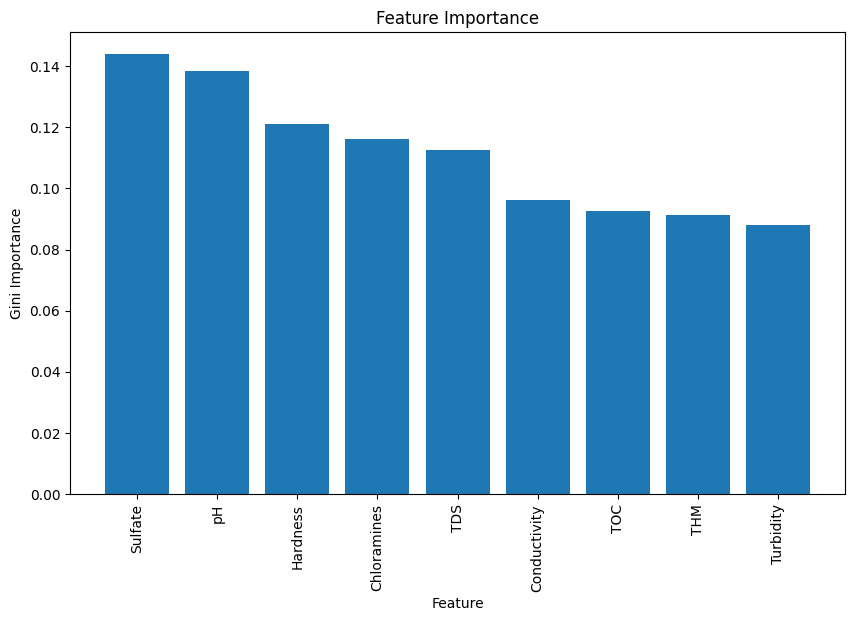

In [29]:
importance = water_classifier.feature_importances_

# Sort feature importance in descending order
sorted_indices = np.argsort(importance)[::-1]

# Get feature names
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), importance[sorted_indices])
plt.xticks(range(len(importance)), feature_names[sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Gini Importance')
plt.title('Feature Importance')

plt.show()


Which have you found to be the most important parameters in your model? 

## Section 4: Classification with Support Vector Machines

A support vector machine splits different classifications using a hyperplane, the structure of which depends on the input [kernel](https://en.wikipedia.org/wiki/Support_vector_machine) that is used. 

<center>
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png" width=40%>
</center>

To use a support vector machine for classification, we can use the following. 

In [22]:
from sklearn.svm import SVC

svc = SVC(random_state=42, gamma='auto')
svc.fit(X_train, y_train)


SVC(gamma='auto', random_state=42)

#### Question

Look at the documentation online for the `SVC` method. Why has the value of `gamma` been set to `'auto'`?

Pre-scaled

We can then start to predict the support vector machine classification results and compare this with the random forest. 

In [23]:
y_pred = svc.predict(X_test)
testing_accuracy = svc.score(X_test, y_test) * 100
print(f'Accuracy on training data: {testing_accuracy:.1f} %')

Accuracy on training data: 66.0 %


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       300
           1       0.66      0.32      0.43       203

    accuracy                           0.66       503
   macro avg       0.66      0.61      0.59       503
weighted avg       0.66      0.66      0.63       503



#### Question

How does the support vector machine perform compared to the random forest?

Worse, 66% from 67.4%

## Task 3: Support vector machine kernel comparison

In [26]:
list1 = ['linear', 'poly', 'rbf', 'sigmoid']

for i in list1:
    svc = SVC(random_state=42, gamma='auto', kernel=i)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    testing_accuracy = svc.score(X_test, y_test) * 100
    print(f'Accuracy of {i} kernel on training data: {testing_accuracy:.1f} %')

Accuracy of linear kernel on training data: 59.6 %
Accuracy of poly kernel on training data: 60.4 %
Accuracy of rbf kernel on training data: 66.0 %
Accuracy of sigmoid kernel on training data: 53.7 %


Look at the `SVC` documentation and determine how to change the kernel used for the support vector machine. 
Find the kernel that offers the best classification of the data. 

Kernel = 'rbf' (default)

## Task 4: Investigation of Wine Data with Classification.

Consider a new dataset (`wine_dataset_1.csv`) that categorises wine based on 13 factors.
These wines are associated with a class, either 1, 2, or 3, associated with New Zealand, South Africa and Chile, respectively. 
Use this data to produce a supervised machine-learning model to classify the data.

Once you have trained the model, read in the `wine_dataset_2.csv` file where all the classes are `NaN`, i.e., the data are not yet classified.
Classify the new data using the model that you built. 

In [31]:
wine_dataset_1 = pd.read_csv('wine_dataset_1.csv')
wine_dataset_1.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060
1,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
2,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
3,1,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
4,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380


In [44]:
X = wine_dataset_1.drop('Class', axis=1)
scaled_X = StandardScaler().fit_transform(X)
y = wine_dataset_1['Class']

In [45]:
wine_classifier = RandomForestClassifier(random_state=0)
wine_classifier.fit(scaled_X, y)

RandomForestClassifier(random_state=0)

In [46]:
# Testing set
wine_dataset_2 = pd.read_csv('wine_dataset_2.csv')
wine_dataset_2.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045
1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770
2,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
3,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985
4,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


In [48]:
scaled_X_data2 = StandardScaler().fit_transform(wine_dataset_2)
y_pred = wine_classifier.predict(scaled_X_data2)
y_pred

array([1, 1, 1, 1, 2, 2, 2, 3], dtype=int64)

## Post Work

Finally, combine the two datasets and use principal components analysis (PCA), an unsupervised machine learning approach, to investigate the data. 
In particular, visualise the data transformed into the first and second principal components space. 
Using this approach, do you trust your classification?